# Importing the library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\tiwarikrishna.ENTECNIA\\Documents\\Capstone Project\\Data-Science-Capstone-Projects-master\\Project 2\\Healthcare - Diabetes'

In [3]:
#importing the dataset
df = pd.read_csv('health care diabetes.csv')
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Descriptive Analysis

In [5]:
df.isnull().values.any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Data Exploration
1. Perform descriptive analysis. Understand the variables and their corresponding values.On the columns below, a value of zero does not make sense and thus indicates missing value.

In [7]:
# Getting the statistical measures of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# **Insights from Descriptive Analysis

It seems in above results, there is 768 observations of 9 variable. Above we see the basic statistics about the diabetes dataframe some point to note

- For Pregnancy we have min of 0 and max of 17 with a mean of 3.8
- one thing to note is that for many of the predictors (Glucose, BP, Skinthickness, Insulin, BMI) we have min, reading of 0 which is not possible, so it is most like be the missing values which needs to be imputes based on the distribution of these predictors
- For age values ranges from 21-81 with a means of 33.24 which is somewhat normal distributes

#### _Treating Missing values and Analysing Distribution of the data_
2. Visually explore these variables using histograms. Treat the missing values accordingly.

Mean of Glucose level is :- 120.89453125
Datatype of Glucose Variable is: int64


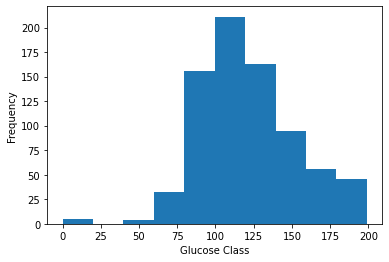

In [8]:
plt.xlabel('Glucose Class')
df['Glucose'].plot.hist()
print("Mean of Glucose level is :-", df['Glucose'].mean())
print("Datatype of Glucose Variable is:",df['Glucose'].dtypes)

__Now i am going to treat here missing values which is basically 0 by means of Glucose level, as 0 Glucose level is not possible in living person. This is because we can see from histogram most of observations have Glucose level between 100 and 120.__

In [9]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())

Mean of BloodPressure level is :- 69.10546875
Datatype of BloodPressure Variable is: int64


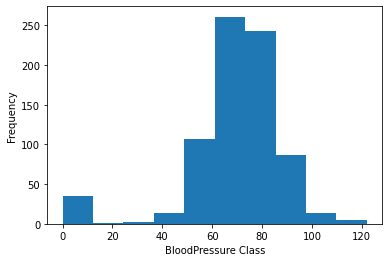

In [10]:
plt.xlabel('BloodPressure Class')
df['BloodPressure'].plot.hist()
print("Mean of BloodPressure level is :-", df['BloodPressure'].mean())
print("Datatype of BloodPressure Variable is:",df['BloodPressure'].dtypes)

#### __I am treating missing values which is basically 0 by mean of BloodPressure level. This is because we can see from histogram most of observation have BP level between 70 and 80.__

In [11]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())

Mean of SkinThickness is :- 20.536458333333332
Datatype of SkinThickness Variable is: int64


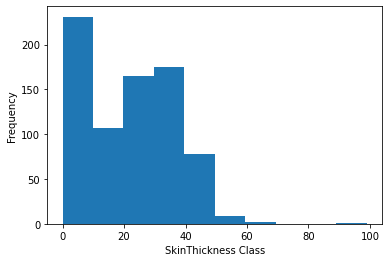

In [12]:
plt.xlabel('SkinThickness Class')
df['SkinThickness'].plot.hist()
print("Mean of SkinThickness is :-", df['SkinThickness'].mean())
print("Datatype of SkinThickness Variable is:",df['SkinThickness'].dtypes)

__I am treating missing values which is basically 0 by mean of SkinThickness. This is because we can see from histogram most of observation have SkinThickness between 20 and 30.__

In [13]:
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

Mean of Insulin is :- 79.79947916666667
Datatype of Insulin Variable is: int64


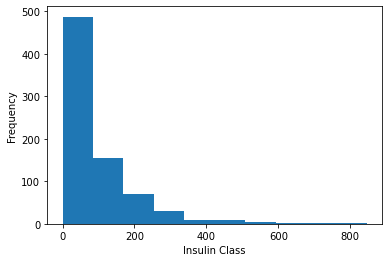

In [14]:
plt.xlabel('Insulin Class')
df['Insulin'].plot.hist()
print("Mean of Insulin is :-", df['Insulin'].mean())
print("Datatype of Insulin Variable is:",df['Insulin'].dtypes)

In [15]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())

Mean of BMI is :- 31.992578124999977
Datatype of BMI Variable is: float64


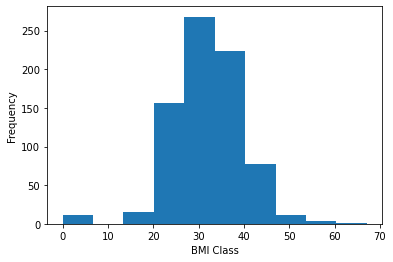

In [16]:
plt.xlabel('BMI Class')
df['BMI'].plot.hist()
print("Mean of BMI is :-", df['BMI'].mean())
print("Datatype of BMI Variable is:",df['BMI'].dtypes)

In [17]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

As Such we do not see Strong correlation between any predictor variable when look form the outcome point of view there are some what positive corr with Glucose level, BMI, Age, Preg in that order

So now we can move onto the model building part

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


Count of class is:
 0    500
1    268
Name: Outcome, dtype: int64


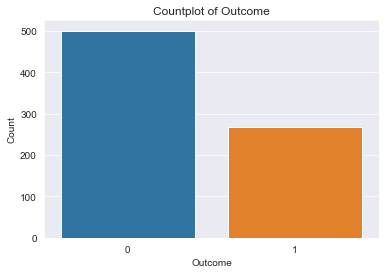

In [19]:
sns.set_style('darkgrid')
sns.countplot(df['Outcome'])
plt.title("Countplot of Outcome")
plt.xlabel('Outcome')
plt.ylabel("Count")
print("Count of class is:\n",df['Outcome'].value_counts())

So we have about 65% non-diabetic and 35% diabetic

Now we have some idea about the dataset

Now lets deal with the missing values. Although in isna we dont have any missing values. we saw above that we have lot of zero values in many of the predictors (Glucose, BP, Skinthickness, Insulin, BMI) which is not possible. So we have to treat these zero as missing values and impute them in some manner

- Before dealing with them lets check the distribution of these variables

Text(0.5, 1.0, 'Scatter plot between variables')

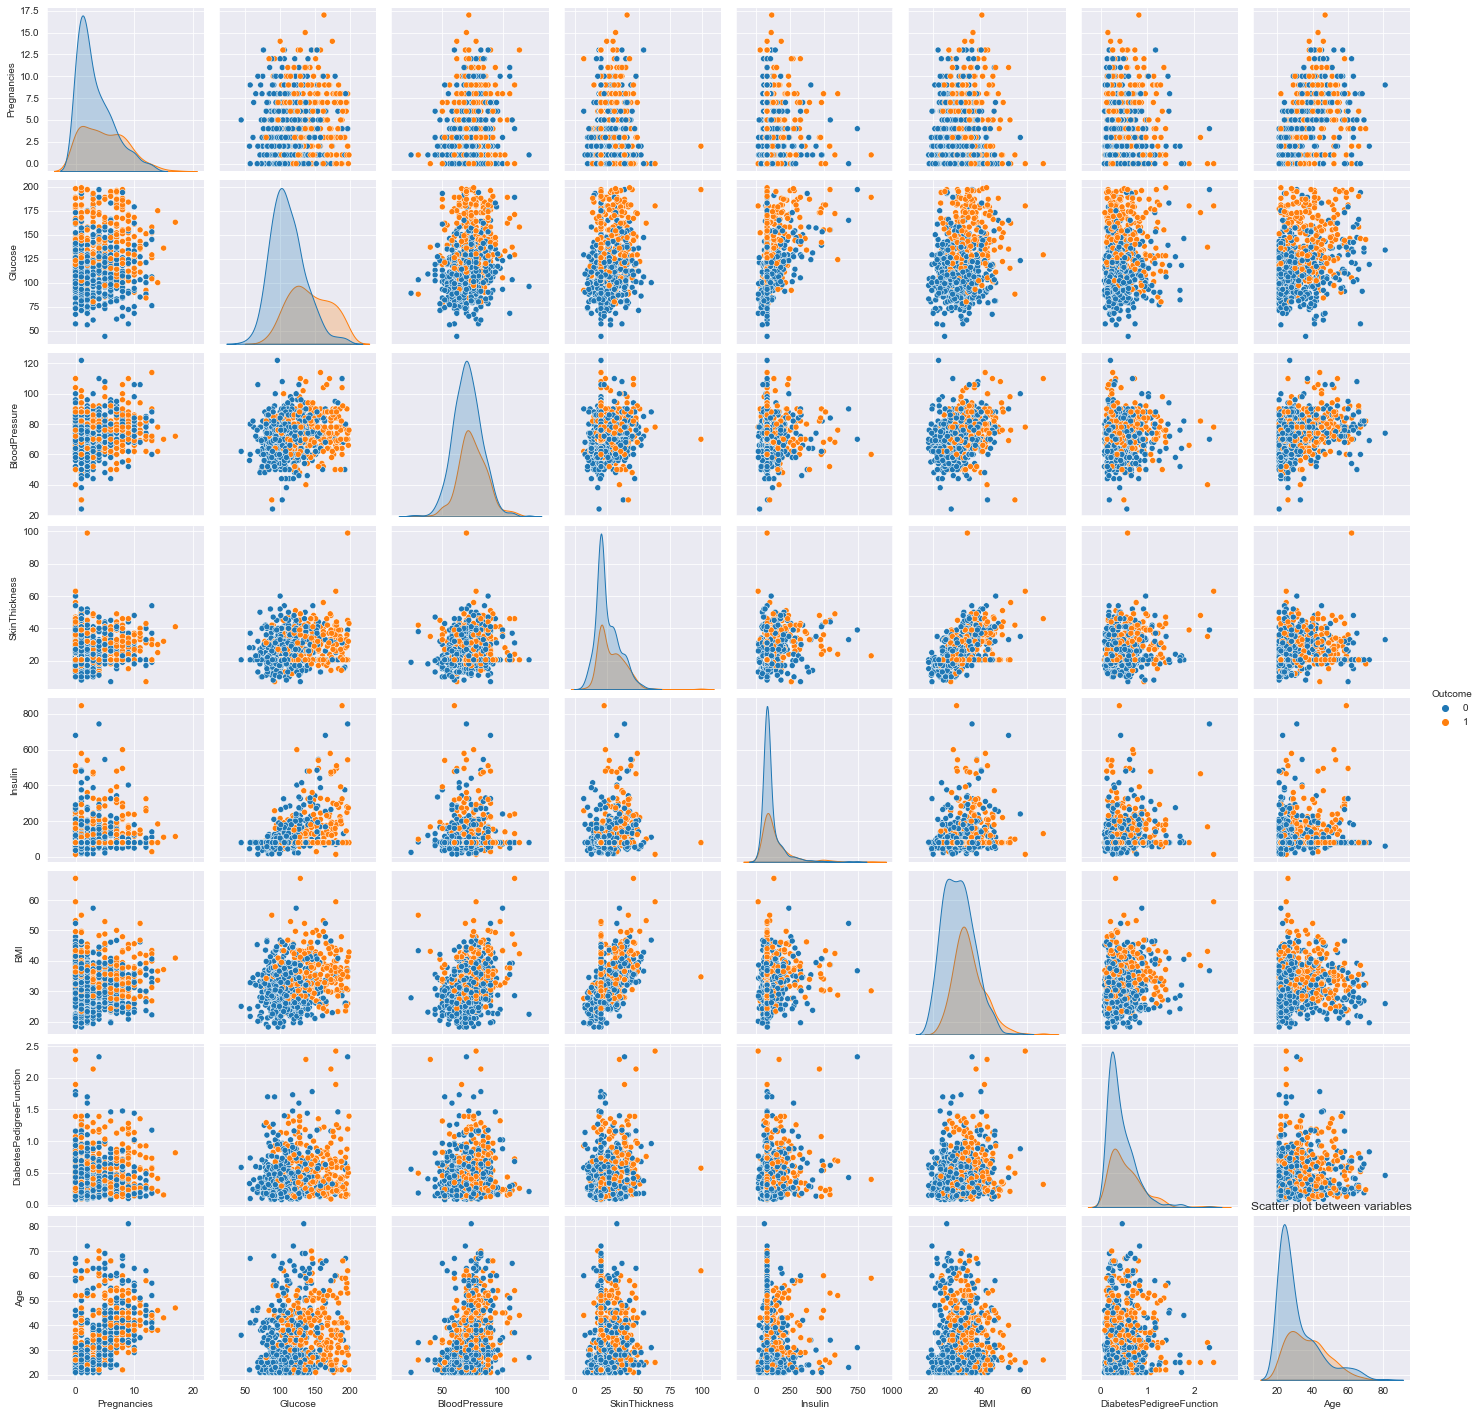

In [20]:
sns.pairplot(df, hue="Outcome")
plt.title('Scatter plot between variables')

We can see from scatter plot that there is no strong multicolinearity among features, but between skin thickness and BMI, Pregnancies and age it looks like there is small chance of positive correlation..i will explore more when analyzing correlation

In [21]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


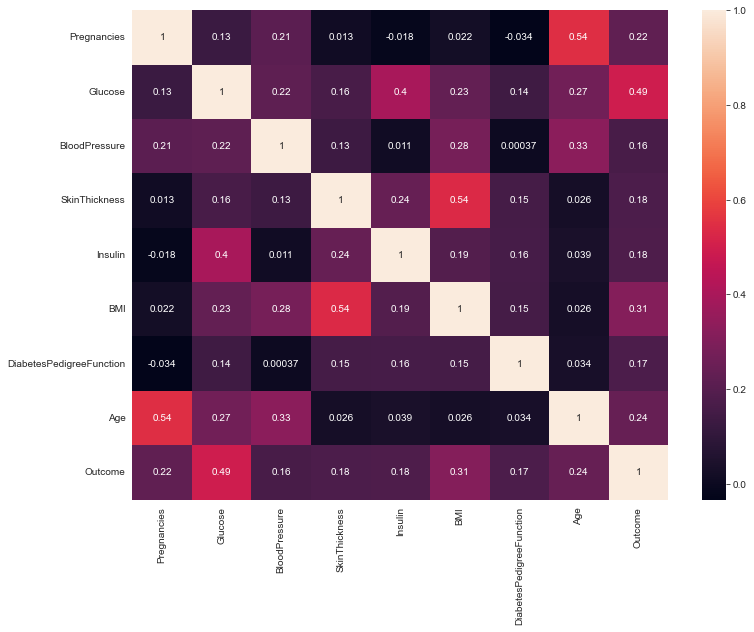

In [22]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

As Such we do not see Strong correlation between any predictor variable when look form the outcome point of view there are some what positive corr with Glucose level, BMI, Age, Preg in that order

So now we can move onto the model building part

## Model Building
Before we move on to the model building and comparing various model with KNN, we need to preprocess the data

First do the test train split

In [23]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state= 42)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(576, 8)
(576,)
(192, 8)
(192,)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

### Applying the KNN Classification

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train_sc, y_train)
knn_pred = knn_model.predict(X_test_sc)

Model Validation ==>

Accuracy Score of KNN Model::
0.7291666666666666

 Classification Report::
              precision    recall  f1-score   support

           0       0.74      0.88      0.81       123
           1       0.68      0.46      0.55        69

    accuracy                           0.73       192
   macro avg       0.71      0.67      0.68       192
weighted avg       0.72      0.73      0.71       192
 


 Confusion Matrix
[[108  15]
 [ 37  32]]

 ROC Curve


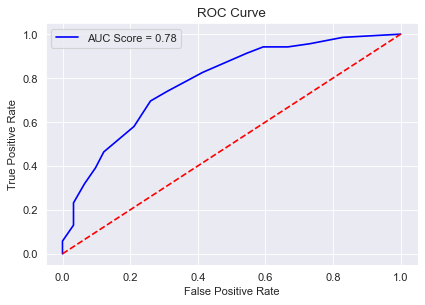

In [28]:
from sklearn import metrics
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model::")
print(metrics.accuracy_score(y_test,knn_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,knn_pred),'\n')
print("\n", "Confusion Matrix")
print(metrics.confusion_matrix(y_test, knn_pred))
print("\n","ROC Curve")
knn_prob=knn_model.predict_proba(X_test_sc)
knn_prob1=knn_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,knn_prob1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

- Here as we see that the precision for both positive and negetive is okay i.e. how many correctly predicted turned out to be positive
- but when we look at the recall values which is how many actual positive (on both diabetic and non diabetic) we are able to predict correctly. Here recall values is very low esp. for the diabetic class. Out of the total diabetic we are able to predict only 46% of the time
- Also the AUC score which is how much better we are able to differentiate between diabetic and non-diabetic class is 78% which is okay.

Now lets train other classifier to see if the position improves

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(X_train_sc, y_train)
y_log_pred = clf_log.predict(X_test_sc)

Logistics Regression Model Validation ==>

Accuracy Score of Logistics Model::
0.734375

 Classification Report::
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       123
           1       0.64      0.61      0.62        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192
 


 Confusion Matrix
[[99 24]
 [27 42]]

 ROC Curve


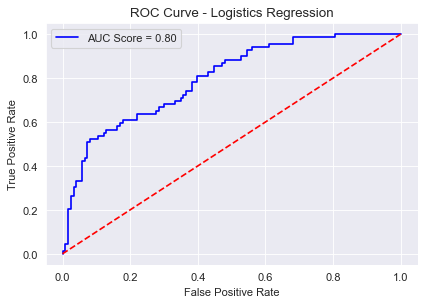

In [30]:
print("Logistics Regression Model Validation ==>\n")
print("Accuracy Score of Logistics Model::")
print(metrics.accuracy_score(y_test,y_log_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test, y_log_pred),'\n')
print("\n", "Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_log_pred))
print("\n","ROC Curve")
log_prob=clf_log.predict_proba(X_test_sc)
log_prob1=log_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,log_prob1)
roc_auc_log=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve - Logistics Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_log)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

its performance is almost same as that of the basic KNN classifier . Some small improvement are shown

- Precision has decrease for positive class by about 5% point
- but Good news is that the recall value have increase as compared to the basic KNN model by 15% point which is a good
- Also the Ability to differentiate has only change by about 2%

### Support Vector Machine

In [31]:
from sklearn.svm import SVC

clf_svc = SVC(kernel='rbf',random_state=42,probability=True)
clf_svc.fit(X_train_sc, y_train)
y_pred_svc = clf_svc.predict(X_test_sc)

Support Vector Machine Model Validation ==>

Accuracy Score of SVM Model::
0.75

 Classification Report::
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       123
           1       0.67      0.61      0.64        69

    accuracy                           0.75       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.75      0.75       192
 


 Confusion Matrix
[[102  21]
 [ 27  42]]

 ROC Curve


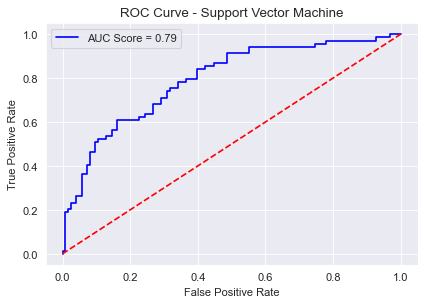

In [32]:
print("Support Vector Machine Model Validation ==>\n")
print("Accuracy Score of SVM Model::")
print(metrics.accuracy_score(y_test,y_pred_svc))
print("\n","Classification Report::")
print(metrics.classification_report(y_test, y_pred_svc),'\n')
print("\n", "Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred_svc))
print("\n","ROC Curve")
svc_prob=clf_svc.predict_proba(X_test_sc)
svc_prob1=svc_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,svc_prob1)
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve - Support Vector Machine")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

Not much has change with the using SVM model some parameter like accracy has increase but not much improvement

Lets see the Random Forest model

### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(n_estimators=1000,random_state = 42)
clf_forest.fit(X_train_sc, y_train)
y_pred_for = clf_forest.predict(X_test_sc)

Random Forest Model Validation ==>

Accuracy Score of Random Forest Model::
0.7604166666666666

 Classification Report::
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       123
           1       0.66      0.70      0.68        69

    accuracy                           0.76       192
   macro avg       0.74      0.75      0.74       192
weighted avg       0.76      0.76      0.76       192
 


 Confusion Matrix
[[98 25]
 [21 48]]

 ROC Curve


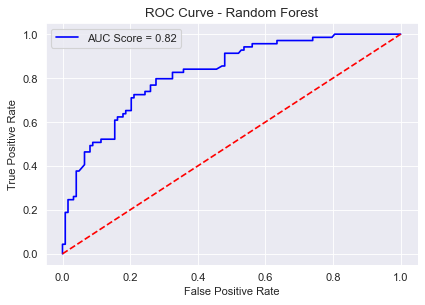

In [34]:
print("Random Forest Model Validation ==>\n")
print("Accuracy Score of Random Forest Model::")
print(metrics.accuracy_score(y_test,y_pred_for))
print("\n","Classification Report::")
print(metrics.classification_report(y_test, y_pred_for),'\n')
print("\n", "Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred_for))
print("\n","ROC Curve")
for_prob=clf_forest.predict_proba(X_test_sc)
for_prob1=for_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,for_prob1)
roc_auc_for=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve - Random Forest")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_for)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

As compared to the Basic KNN model we see following improvement

- Accuracy has increase from 73% to 76%
- precision
    - for non-diabetic it is showing much improvement from 74% to 82%
    - but for diabetic it has declined from 68 to 66% which means out of 100 total diabetic that it predict 66 are actually diabetic
- Recall
    - for non-diabetic it is showing the decline from 88% to 80% which means earlier out of total 100 non diabetic it is able to predict 88 correctly but now only 80 are correctly diagnosed as Non-diabetic
    - But Good news is that for diabetic values has increase from 46% to 70% which means earlier out of 100 diabetic KNN model was able to do correct prediction for only 46 person which has now increase to 70 people
- AUC (ROC) score has measly increase from 78% to 82%

### Applying the oversampling techniques to balance the dataset

Earlier we saw that we have an imbalance data i.e. 65% of cases are of non-diabetic class and 35% are for the diabetic class. This is the big reason for not able to correctly predict the diabetic classification as compared to the Non diabetic classification

To solve this we will apply Oversampling techniques like SMOTE (Synthetic minority oversamping technique)

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together

In [35]:
from collections import Counter
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print("Before Oversampling", counter)
smt = SMOTE()

X_train_sm, y_train_sm = smt.fit_resample(X_train_sc,y_train)
counter = Counter(y_train_sm)
print("After Oversampling", counter)

Before Oversampling Counter({0: 377, 1: 199})
After Oversampling Counter({1: 377, 0: 377})


### Applying the Logistic regression on Oversampled data

In [36]:
clf_log_sm = LogisticRegression()
clf_log_sm.fit(X_train_sm, y_train_sm)
y_log_pred = clf_log.predict(X_test_sc)

Logistics Regression Model using smote ==>

Accuracy Score of Logistics Model::
0.734375

 Classification Report::
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       123
           1       0.64      0.61      0.62        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192
 


 Confusion Matrix
[[99 24]
 [27 42]]

 ROC Curve


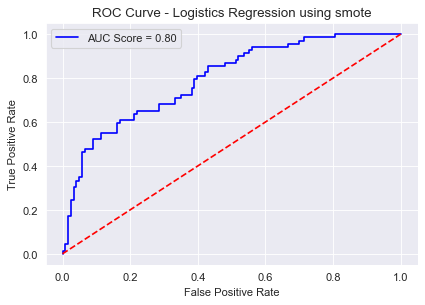

In [37]:
print("Logistics Regression Model using smote ==>\n")
print("Accuracy Score of Logistics Model::")
print(metrics.accuracy_score(y_test,y_log_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test, y_log_pred),'\n')
print("\n", "Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_log_pred))
print("\n","ROC Curve")
log_prob=clf_log_sm.predict_proba(X_test_sc)
log_prob1=log_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,log_prob1)
roc_auc_log=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve - Logistics Regression using smote")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_log)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

Although we see a small decrease in accuracy but the recall values of diabetic is same

### Applying SVM on Oversampled data

In [38]:
from sklearn.svm import SVC

clf_svc_sm = SVC(kernel='rbf',random_state=42,probability=True)
clf_svc_sm.fit(X_train_sm, y_train_sm)
y_pred_svc = clf_svc_sm.predict(X_test_sc)

Support Vector Machine Model on Oversampled data ==>

Accuracy Score of SVM Model::
0.703125

 Classification Report::
              precision    recall  f1-score   support

           0       0.84      0.67      0.74       123
           1       0.56      0.77      0.65        69

    accuracy                           0.70       192
   macro avg       0.70      0.72      0.70       192
weighted avg       0.74      0.70      0.71       192
 


 Confusion Matrix
[[82 41]
 [16 53]]

 ROC Curve


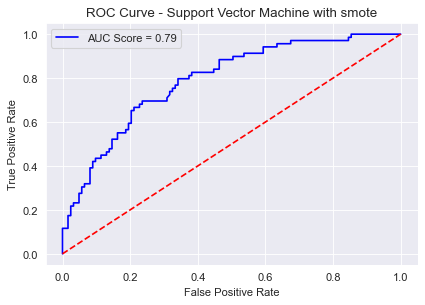

In [39]:
print("Support Vector Machine Model on Oversampled data ==>\n")
print("Accuracy Score of SVM Model::")
print(metrics.accuracy_score(y_test,y_pred_svc))
print("\n","Classification Report::")
print(metrics.classification_report(y_test, y_pred_svc),'\n')
print("\n", "Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred_svc))
print("\n","ROC Curve")
svc_prob=clf_svc_sm.predict_proba(X_test_sc)
svc_prob1=svc_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,svc_prob1)
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve - Support Vector Machine with smote")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

Although we see a small decrease in the  accuracy but the recall value of diabetic has increased 61 to 75%

### Applying Random Forest on Oversampled data

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf_forest_sm = RandomForestClassifier(n_estimators=1000,random_state = 42)
clf_forest_sm.fit(X_train_sm, y_train_sm)
y_pred_for = clf_forest_sm.predict(X_test_sc)

Random Forest Model Validation using smote ==>

Accuracy Score of Random Forest Model using smote::
0.7708333333333334

 Classification Report::
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       123
           1       0.66      0.75      0.70        69

    accuracy                           0.77       192
   macro avg       0.75      0.77      0.76       192
weighted avg       0.78      0.77      0.77       192
 


 Confusion Matrix
[[96 27]
 [17 52]]

 ROC Curve


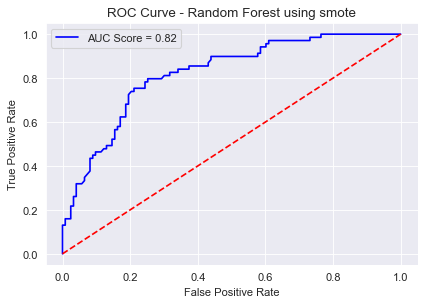

In [41]:
print("Random Forest Model Validation using smote ==>\n")
print("Accuracy Score of Random Forest Model using smote::")
print(metrics.accuracy_score(y_test,y_pred_for))
print("\n","Classification Report::")
print(metrics.classification_report(y_test, y_pred_for),'\n')
print("\n", "Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred_for))
print("\n","ROC Curve")
for_prob=clf_forest_sm.predict_proba(X_test_sc)
for_prob1=for_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,for_prob1)
roc_auc_for=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve - Random Forest using smote")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_for)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

AS we can see that with using the oversampled data we are able to incrase the recall values 70% to 80% at the cost of 3% point decrease in the accuracy.

That means that we are able to better identify the diabetic person at the cost of few non-diabetic that could be misclassified as diabetic.